# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2. Read Datasheet

In [3]:
df = pd.read_csv("fifa_eda.csv")
print(df.shape)

(18207, 18)


so the dataset has 18 attributes and 18207 rows

In [4]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


# 3. Time for cleaning the dataset

Dataset cleaning is an important set of any EDA as it will help in understanding the patterns well. we will start by seeing whether the dataset has any null values or not.

In [5]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

So we see that the attributes such as 'Club':241, 'Contract Valid Unitl':289, 'International Reputation':48, 'Skill Moves':48, 'Value':252, contains null values. we will remove the tuples which contain such null values.

In [11]:
df = df.dropna(subset=['Club','Contract Valid Until',
                       'International Reputation','Skill Moves','Value'])

Lets check that whether we were able to succesfull remove all the tuples which containes null values.

In [12]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

So now we can rest assured that all the dataset has been completely cleaned off of null values.











S now since the dataset cleaning step is complete we can focus more on exploring the dataset itself.

# 4. Checking the number of unique instance of an attribute

In [13]:
for f in df.columns:
    print(f,df[f].nunique())

ID 17907
Name 16913
Age 28
Nationality 163
Overall 48
Potential 47
Club 651
Value 216
Wage 143
Preferred Foot 2
International Reputation 5
Skill Moves 5
Position 27
Joined 22
Contract Valid Until 35
Height 21
Weight 57
Release Clause 1245


In [14]:
df.columns.nunique()

18

# 5. Age

Lets take a closer look at the age of the players. More accurately we will focusing on the distribution of the age data.

25.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

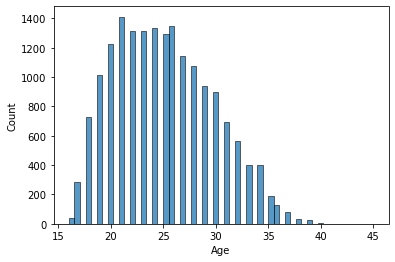

In [15]:
print(df['Age'].median())
sns.histplot(x='Age',data=df)

The median age is 25 i.e most of the players have age closer to 25.

In [16]:
df["Age"].median()

25.0

# 6. Preferred Foot

Lets see whether majority of players prefer left foot or right foot.

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

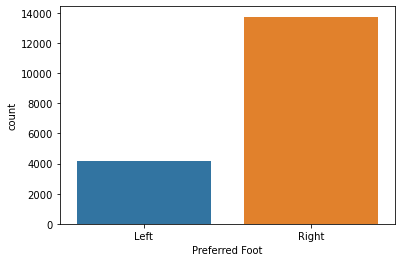

In [17]:
sns.countplot(x='Preferred Foot',data=df)

It seems most players like prefer to take the shot with rigth foot. but still unclear on how many players though

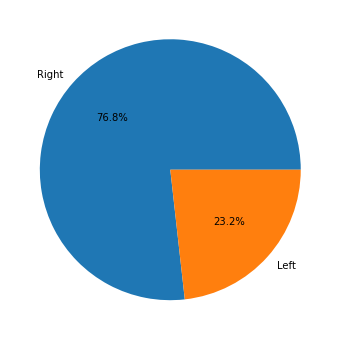

In [18]:
plt.subplots(figsize=(6,6))
plt.pie(df["Preferred Foot"].value_counts(),
        labels=["Right","Left"],autopct="%1.1f%%")
plt.show()

well now we know 76.8% of the players prefer right foot


# 7. Position they play in

Lets find out with position most players play in

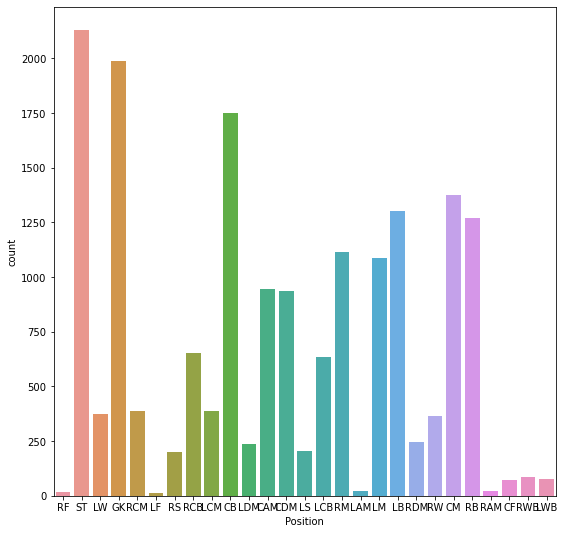

In [19]:
plt.subplots(figsize=(9,9))
sns.countplot(x='Position',data=df)
plt.show()

It seems as though most players play in the ST position

# 8. International Reputation

International Reputation is a huge fator when it comes to a player and the team he is in. let us take a closer look as to how strong are their reputation on a scale of 1-5

<AxesSubplot:xlabel='International Reputation', ylabel='count'>

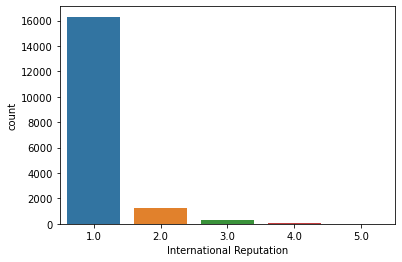

In [28]:
sns.countplot(x="International Reputation",data=df)

This gives us an early idea as to how many players have the highest international reputation.

# 6. Skill Moves

Skill Moves of a player directly translates into their performance in a game.

<AxesSubplot:xlabel='Skill Moves', ylabel='count'>

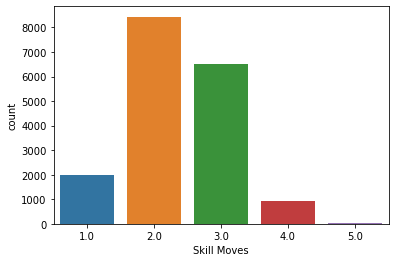

In [29]:
sns.countplot(x="Skill Moves",data=df)

Most of the players are of skill set point 2.

# 7. Nationality

Lets find the top 10 countries with the most players in FIFA.

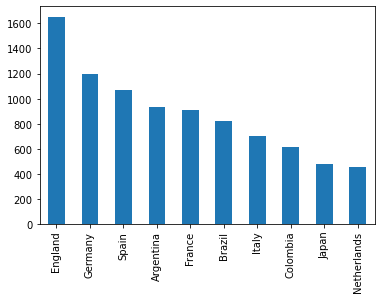

In [30]:
national = df["Nationality"].value_counts()[:10]
national.plot.bar()
plt.show()

England is at the top for holding most fifa players.

# 8. Value,Wage,Release Clause

From here on now, we will focus on the relation between these three attributes.

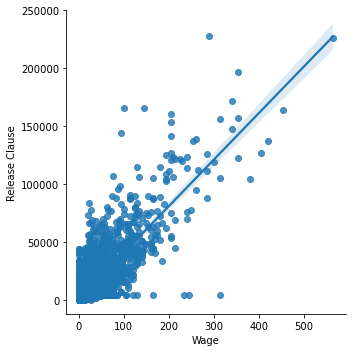

In [31]:
sns.lmplot(x='Wage',y='Release Clause',data=df)

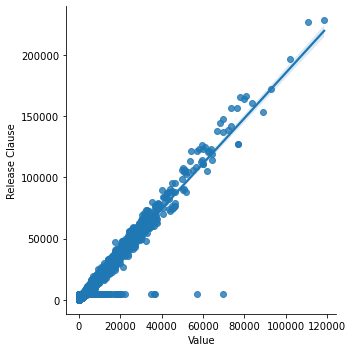

In [32]:
sns.lmplot(x='Value',y='Release Clause',data=df)

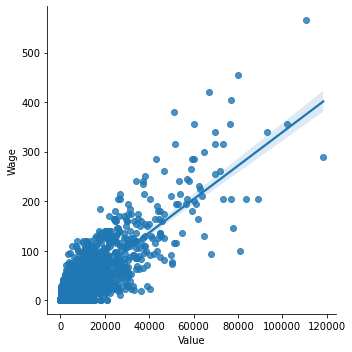

In [33]:
sns.lmplot(x='Value',y='Wage',data=df)

# 8. Clubs

In [35]:
df['Club'].value_counts().sort_values(ascending=False).head()

FC Barcelona           33
Eintracht Frankfurt    33
Southampton            33
Manchester City        33
Manchester United      33
Name: Club, dtype: int64

Lastly, we will take a look at the top 5 clubs with most players.

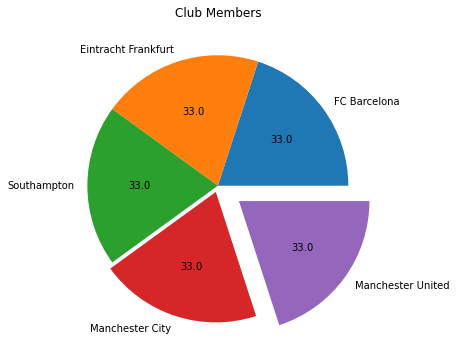

In [40]:
plt.subplots(figsize=(6,6))
size = df['Club'].value_counts().sort_values(ascending=False).head(5)

def value(val):
    x = np.round(val/100.*size.sum())
    return x


plt.pie(size,labels=size.index,autopct=value,explode=[0,0,0,0.05,0.2])
plt.title("Club Members")
plt.show()